In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('C:/Users/ajmal/Downloads/StudentsPerformance.csv')

In [86]:
data.describe()

,math score,reading score,writing score,total
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000,203.315000
std,15.569567,14.706436,15.226381,43.227009
min,0.000000,17.000000,10.000000,27.000000
25%,57.000000,59.000000,58.000000,175.000000
50%,66.000000,70.000000,69.000000,206.000000
75%,77.000000,79.250000,79.000000,233.250000
max,100.000000,100.000000,100.000000,300.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [74]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [75]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

# Finding the number of each gender

In [10]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# Parental level of education

In [ ]:
#there seems to be no significant correlation between median score and parental education level

In [13]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

<AxesSubplot:xlabel='parental level of education', ylabel='total'>

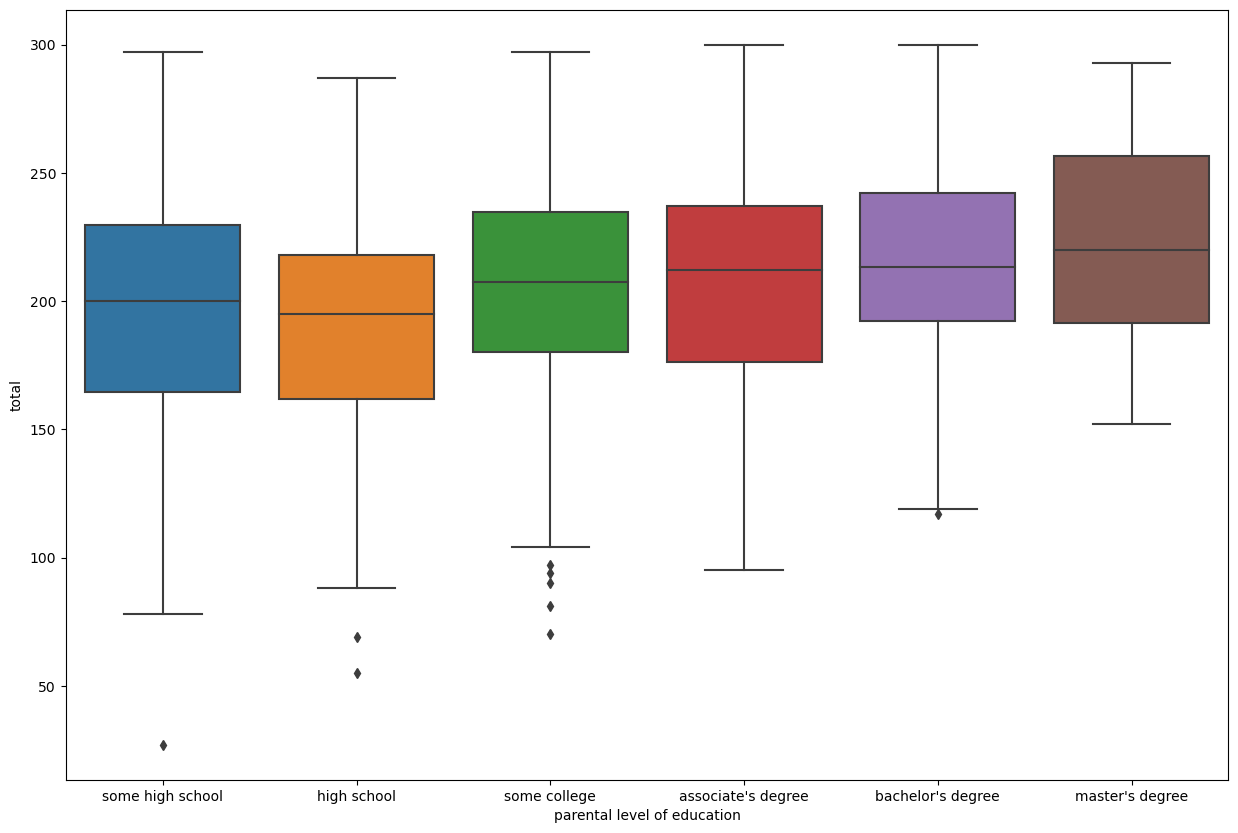

In [120]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data['parental level of education'],y=data['total'])

In [83]:
data.groupby(['parental level of education']).size().reset_index()

,parental level of education,0
0,associate's degree,222
1,bachelor's degree,118
2,high school,196
3,master's degree,59
4,some college,226
5,some high school,179


In [84]:
marksdata=data.groupby(['gender','total']).size().mean()

In [85]:
marksdata

3.0303030303030303

In [27]:
marksdata2=data.groupby(['test preparation course']).size().reset_index()

In [29]:
marksdata2

,test preparation course,0
0,completed,358
1,none,642


In [104]:
data['total']=data['math score']+data['reading score']+data['writing score']

In [105]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group C,some high school,free/reduced,none,0,17,10,27
1,female,group B,high school,free/reduced,none,8,24,23,55
2,female,group B,some high school,free/reduced,none,18,32,28,78
3,female,group B,some college,standard,none,11,38,32,81
4,female,group C,some college,free/reduced,none,22,39,33,94
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,267
996,male,group A,some college,standard,completed,100,96,86,282
997,male,group D,some college,standard,completed,100,97,99,296
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293


# Gender,Preparation and score 

In [44]:
data.loc[data['gender'] == 'female', 'total'].mean()

208.43436293436292

In [45]:
data.loc[data['gender'] == 'male', 'total'].mean()

197.81327800829877

In [57]:
data.loc[data['test preparation course'] == 'none', 'total'].mean()

194.6651090342679

In [58]:
data.loc[data['test preparation course'] == 'completed', 'total'].mean()

218.8268156424581

In [101]:
data.loc[(data['test preparation course'] == 'none') & (data['gender'] == 'female'),'total'].mean()

200.2574850299401

In [102]:
data.loc[(data['test preparation course'] == 'completed') & (data['gender'] == 'female'),'total'].mean()

223.27717391304347

In [103]:
data.loc[(data['test preparation course'] == 'completed') & (data['gender'] == 'male'),'total'].mean()

214.1206896551724

In [107]:
data.loc[(data['test preparation course'] == 'none') & (data['gender'] == 'male'),'total'].mean()

188.60064935064935

In [ ]:
#whether with preparation or not, female students tend to score higher than their male counterparts.

<AxesSubplot:xlabel='gender', ylabel='total'>

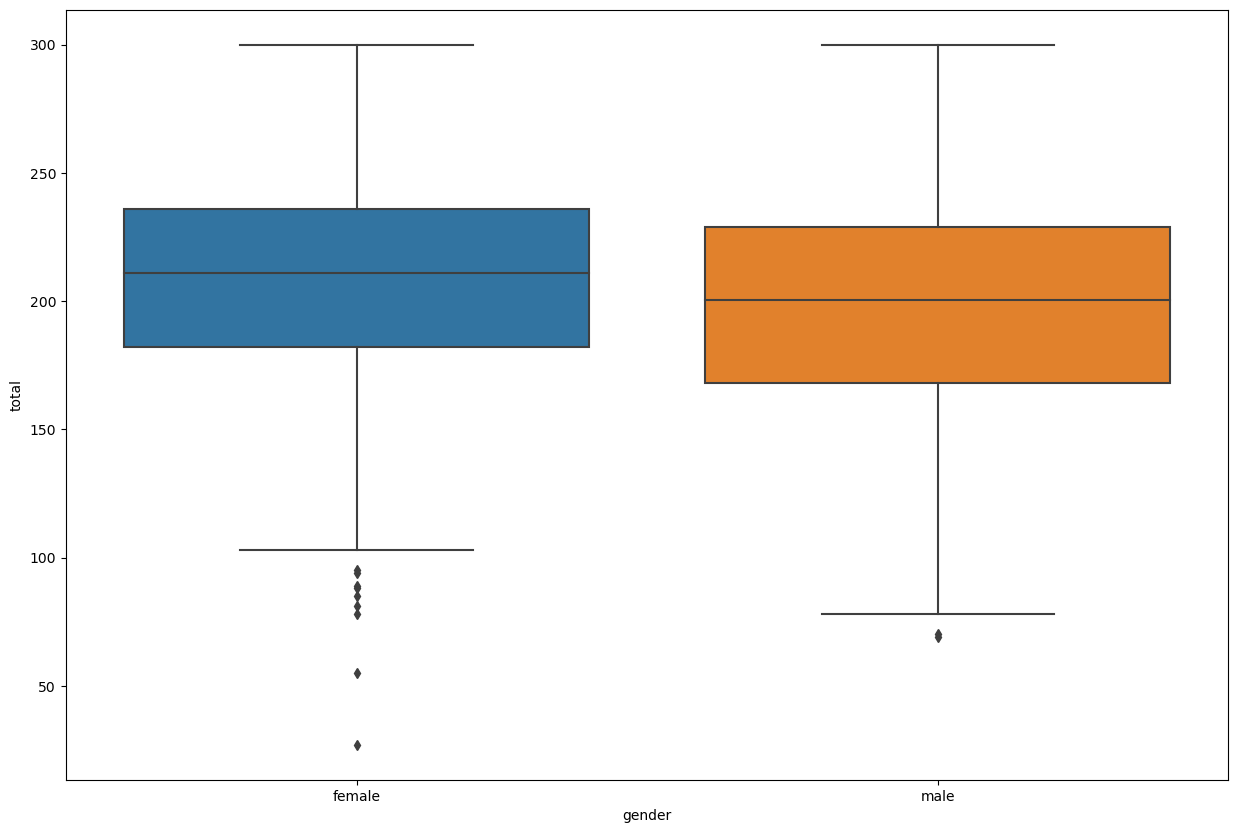

In [121]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data['gender'],y=data['total'])

In [ ]:
# While median score for the female students is higher than that of male students, there are significantly more of outliers as well. Thus female category has a higher variance.
          

<AxesSubplot:xlabel='test preparation course', ylabel='total'>

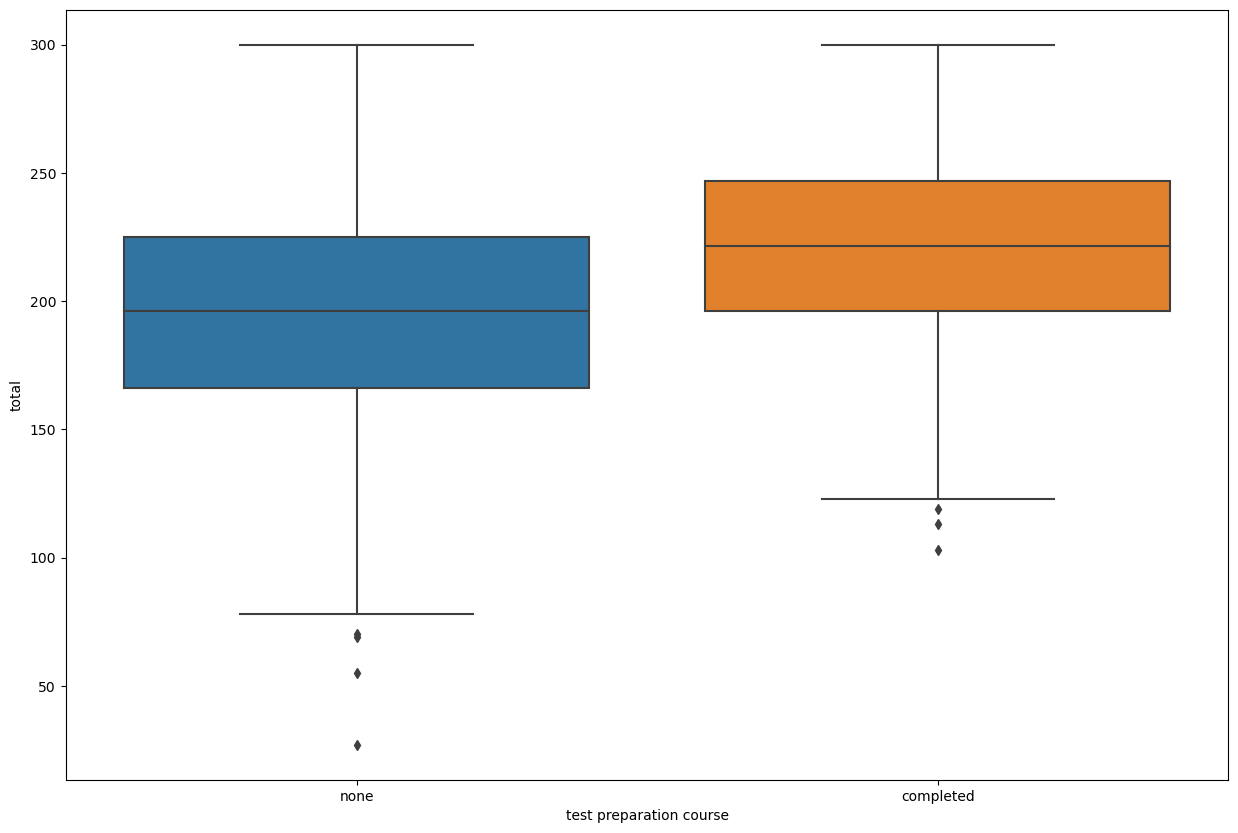

In [125]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data['test preparation course'],y=data['total'])

In [ ]:
#for the prepared students the median score is significantly higher than that of the non-prepared category, and the outliers in the 'none' category is way off than that of the 'completed' category which means there is a higher variance in that category
          